In [188]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

import sys, os
sys.path.insert(0, os.path.abspath("/Users/marcdanielregistre/machine_learning/pytorch"))
from helper_functions import plot_predictions, plot_decision_boundary


In [189]:

NUM_FEATURES = 2
NUM_CLASSES = 4
X, y = make_blobs(n_samples=1000, n_features=NUM_FEATURES, centers=NUM_CLASSES, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=42)

X[:5], y[:5]

(array([[-8.55503989,  7.06461794],
        [-6.13753182, -6.58081701],
        [-6.32130028, -6.8041042 ],
        [ 4.18051794,  1.12332531],
        [ 4.38028748,  0.47002673]]),
 array([3, 2, 2, 1, 1]))

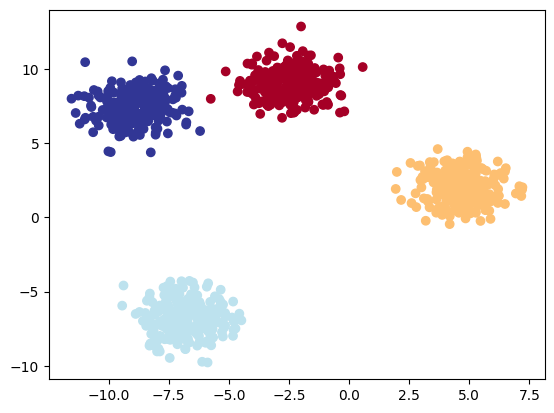

In [190]:
# there are two input which are features and outputs are 4 possible outputs or centers.
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)


In [191]:
# split training and testing dagta
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=42)
len(X_train), len(y_train), len(X_test), len(y_test)

(800, 800, 200, 200)

In [192]:
# change data to tensor since machine learning learns better with tensors
X_train = torch.from_numpy(X_train).type(torch.float32)
y_train = torch.from_numpy(y_train).type(torch.float32)
X_test = torch.from_numpy(X_test).type(torch.float32)
y_test = torch.from_numpy(y_test).type(torch.float32)

y_train = y_train.to(torch.float32)
dtype=torch.long
X_train[:5], y_train[:5]

(tensor([[ 4.9069,  2.8628],
         [-2.5863,  9.3554],
         [-7.9759, -8.3202],
         [-6.3106, -5.2517],
         [-3.0628,  7.8164]]),
 tensor([1., 0., 2., 2., 0.]))

In [193]:
class MulticlassClassification(nn.Module):
    def __init__(self, inFeatures, outFeatures, hidden_layers_depth=10):
        super().__init__()
        self.linear_stack = nn.Sequential(
            nn.Linear(in_features = inFeatures, out_features = hidden_layers_depth),
            #nn.ReLU(),
            nn.Linear(in_features = hidden_layers_depth, out_features = hidden_layers_depth),
            #nn.ReLU(),
            nn.Linear(in_features = hidden_layers_depth, out_features = outFeatures)
        )

    def forward(self,
                x: torch.Tensor) -> torch.Tensor :
        return self.linear_stack(x)

# we took out Relu because our data is linearly separable. However, we could have kept it. 
# when data contains non-linear data to it, yes, do add Relu.
        

In [194]:
model = MulticlassClassification(NUM_FEATURES, NUM_CLASSES, 10)
model.state_dict()

OrderedDict([('linear_stack.0.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]])),
             ('linear_stack.0.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984])),
             ('linear_stack.1.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.1222, -0.2426,  

In [195]:
# LOSS FUNCTION - calculate hte loss between probability output vs actual output during training
loss_fn = nn.CrossEntropyLoss()
# optimizer
optimizer = optim.SGD(model.parameters(), lr=0.1)# update the weights and biases
X_train.shape, y_train.shape

(torch.Size([800, 2]), torch.Size([800]))

In [196]:
def acc(y_pred, value):
    true_value = torch.eq(y_pred, value).sum().item()
    return 100*true_value/len(value)

Epoch: 0, Loss: 2.594780921936035, Acc: 6.875%, Test Loss: 0.649405837059021, Test Acc:86.5%
Epoch: 10, Loss: 0.1321389079093933, Acc: 99.875%, Test Loss: 0.11842897534370422, Test Acc:100.0%
Epoch: 20, Loss: 0.05683533847332001, Acc: 99.875%, Test Loss: 0.052225083112716675, Test Acc:100.0%
Epoch: 30, Loss: 0.034238945692777634, Acc: 99.875%, Test Loss: 0.031224334612488747, Test Acc:100.0%
Epoch: 40, Loss: 0.024171771481633186, Acc: 99.875%, Test Loss: 0.021673820912837982, Test Acc:100.0%
Epoch: 50, Loss: 0.01864507794380188, Acc: 99.875%, Test Loss: 0.016390308737754822, Test Acc:100.0%
Epoch: 60, Loss: 0.015203546732664108, Acc: 99.875%, Test Loss: 0.01309351809322834, Test Acc:100.0%
Epoch: 70, Loss: 0.012873867526650429, Acc: 99.875%, Test Loss: 0.010863494127988815, Test Acc:100.0%
Epoch: 80, Loss: 0.01120079681277275, Acc: 99.875%, Test Loss: 0.009265566244721413, Test Acc:100.0%
Epoch: 90, Loss: 0.009945322759449482, Acc: 99.875%, Test Loss: 0.008070138283073902, Test Acc:100

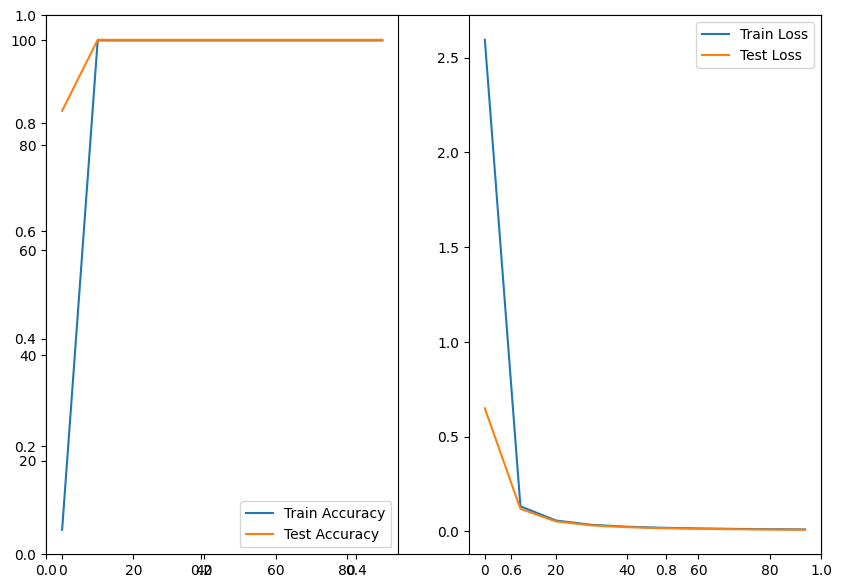

In [197]:
torch.manual_seed(42)

epochs = 100
epoch_count=[]
train_acc = []
test_acc = []

train_losses=[]
test_losses=[]
for epoch in range(epochs):
    model.train()

    # 1. do forward pass
    logits = model(X_train)
    # convert logits output to prediction prob
    y_pred_probs = torch.softmax(logits, dim=1)
     # model output is 4 numbers while with max is the probability prediction
    y_preds = torch.argmax(y_pred_probs, dim=1)
    
    # 2. calculate the loss
    loss = loss_fn(logits, y_train.type(torch.LongTensor))
    
    # 3. do zero gradient to recalculate
    optimizer.zero_grad()

    # 4. backward proptation
    loss.backward()

    #5. do gradioent descent
    optimizer.step()

    # Testing
    model.eval()

    with torch.inference_mode():
        test_logits = model(X_test)
        test_y_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)
        
        test_loss = loss_fn(test_logits, y_test.type(torch.LongTensor))
        
        if epoch % 10 == 0:
            epoch_count.append(epoch)
            
            train_accuracy = acc(y_preds, y_train)
            train_acc.append(train_accuracy)

            test_accuracy = acc(test_y_preds, y_test)
            test_acc.append(test_accuracy)

            train_losses.append(loss.numpy())
            test_losses.append(test_loss.numpy())
            print(f"Epoch: {epoch}, Loss: {loss}, Acc: {train_accuracy}%, Test Loss: {test_loss}, Test Acc:{test_accuracy}%")

plt.subplots(figsize=(10,7))
plt.subplot(1,2,1)
plt.plot(epoch_count, train_acc, label='Train Accuracy')
plt.plot(epoch_count, test_acc, label='Test Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epoch_count, train_losses, label='Train Loss')
plt.plot(epoch_count, test_losses, label='Test Loss')
plt.legend()
plt.show()

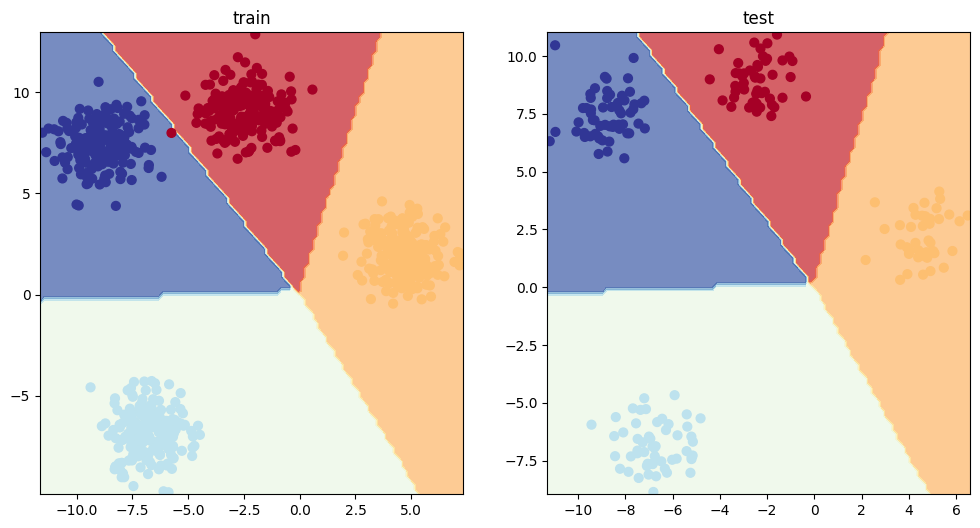

In [198]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('train')
plot_decision_boundary(model, X_train, y_train)

plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model, X_test, y_test)